# Lab 1 Analysis Example using Thicket

In [2]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [3]:
tk = th.Thicket.from_caliperreader(glob("*random.cali")) # dividing it by input type for now
tk.statsframe.dataframe["time"] = 1

In [4]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Barrier
│     ├─ 1.000 MPI_Gather
│     └─ 1.000 MPI_Scatter
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [5]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              8093430       1   
                                                  44116482      1   
                                                  94276197      1   
                                                  219033091     1   
                                                  283278286     1   
                                                  454082887     1   
                                                  684115475     1   
                                                  780855582     1   
                                                  1069041691    1   
                                                  1086346975    1   
                                                  1334158880    1   
                                                  1623070311    1   
                                                  1647999410    1   
                                                  1898519320    1   
                                                  2001593674    1   
                                                  2004720918    1   
                                                  2039840440    1   
                                                  2094734167    1   
                                                  2119909151    1   
                                                  2182384055    1   
                                                  2183150978    1   
                                                  2267451053    1   
                                                  2386708544    1   
                                                  2526295470    1   
                                                  2607152813    1   
                                                  2780974672    1   
                                                  3070090970    1   
                                                  3071862889    1   
                                                  3211007287    1   
                                                  3214940410    1   
                                                  3301102357    1   
                                                  3313303374    1   
                                                  3362717595    1   
                                                  3710943576    1   
                                                  3832358924    1   
                                                  3898863712    1   
                                                  4075680148    1   
                                                  4102926110    1   
                                                  4170699406    1   
                                                  4175302609    1   
                                                  4220346338    1   
                                                  4235843964    1   
{'name': 'comm', 'type': 'function'}              8093430       3   
                                                  44116482      3   
                                                  94276197      3   
                                                  219033091     3   
                                                  283278286     3   
                                                  454082887     3   
                                                  684115475     3   
                                                  780855582     3   
                                                  1069041691    3   
                                                  1086346975    3   
                                                  1334158880    3   
                                                  1623070311    3   
                                                  1647999410    3   
                                                  1898519320    3   
                                                  2001593674

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [6]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,num_procs,num_threads,group_num,implementation_source,Whole computation time
profile,,,,,,,,,,,,,,,,,,,,,,,,,
8093430,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a4194304-random.cali,true,1700069860,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 4194304, random]",c,Countsort,MPI,int,4,4194304,4,1,19,Handwritten & Online Source: Used https://www....,0.170800
44116482,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a67108864-random.cali,true,1700082543,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 67108864, random]",c,Countsort,MPI,int,4,67108864,32,1,19,Handwritten & Online Source: Used https://www....,92.193043
94276197,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576-random.cali,true,1700065092,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 1048576, random]",c,Countsort,MPI,int,4,1048576,2,1,19,Handwritten & Online Source: Used https://www....,0.043908
219033091,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a4194304-random.cali,true,1700084386,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 4194304, random]",c,Countsort,MPI,int,4,4194304,64,1,19,Handwritten & Online Source: Used https://www....,6.600507
283278286,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a67108864-random.cali,true,1700084479,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 67108864, random]",c,Countsort,MPI,int,4,67108864,64,1,19,Handwritten & Online Source: Used https://www....,88.007991
454082887,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a16777216-random.cali,true,1700069543,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 16777216, random]",c,Countsort,MPI,int,4,16777216,2,1,19,Handwritten & Online Source: Used https://www....,0.691622
684115475,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a262144-random.cali,true,1700065649,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 262144, random]",c,Countsort,MPI,int,4,262144,4,1,19,Handwritten & Online Source: Used https://www....,0.024945
780855582,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a65536-random.cali,true,1700081842,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 65536, random]",c,Countsort,MPI,int,4,65536,16,1,19,Handwritten & Online Source: Used https://www....,0.152014
1069041691,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a16777216-random.cali,true,1700082082,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./count_sort_mpi, 16777216, random]",c,Countsort,MPI,int,4,16777216,16,1,19,Handwritten & Online Source: Used https://www....,11.381476


In [7]:
gb = tk.groupby("InputSize")

7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b89e1d64a90>, 262144: <thicket.thicket.Thicket object at 0x2b89e1d97d60>, 1048576: <thicket.thicket.Thicket object at 0x2b89e1ced970>, 4194304: <thicket.thicket.Thicket object at 0x2b89e1e99be0>, 16777216: <thicket.thicket.Thicket object at 0x2b89e1e889d0>, 67108864: <thicket.thicket.Thicket object at 0x2b89e1d568b0>, 268435456: <thicket.thicket.Thicket object at 0x2b89e1d1df70>}


Compose these 3 groups column-wise to get a holistic view of the data

In [8]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="mpi.world.size"
)

In [9]:
ctk.dataframe

65536  \
                                                                   nid   
node                                              mpi.world.size         
{'name': 'main', 'type': 'function'}              2                  1   
                                                  4                  1   
                                                  8                  1   
                                                  16                 1   
                                                  32                 1   
                                                  64                 1   
{'name': 'comm', 'type': 'function'}              2                  3   
                                                  4                  3   
                                                  8                  3   
                                                  16                 3   
                                                  32                 3   
                                                  64                 3   
{'name': 'comm_large', 'type': 'function'}        2                  4   
                                                  4                  4   
                                                  8                  4   
                                                  16                 4   
                                                  32                 4   
                                                  64                 4   
{'name': 'MPI_Barrier', 'type': 'function'}       2                  5   
                                                  4                  5   
                                                  8                  5   
                                                  16                 5   
                                                  32                 5   
                                                  64                 5   
{'name': 'MPI_Gather', 'type': 'function'}        2                  7   
                                                  4                  7   
                                                  8                  7   
                                                  16                 7   
                                                  32                 7   
                                                  64                 7   
{'name': 'MPI_Scatter', 'type': 'function'}       2                  6   
                                                  4                  6   
                                                  8                  6   
                                                  16                 6   
                                                  32                 6   
                                                  64                 6   
{'name': 'comp', 'type': 'function'}              2                  8   
                                                  4                  8   
                                                  8                  8   
                                                  16                 8   
                                                  32                 8   
                                                  64                 8   
{'name': 'comp_large', 'type': 'function'}        2                  9   
                                                  4                  9   
                                                  8                  9   
                                                  16                 9   
                                                  32                 9   
                                                  64                 9   
{'name': 'correctness_check', 'type': 'function'} 2                 10   
                                                  4                 10   
                                                  8                 10   
                                                  16                1

Perform pandas operations to get the table in a desirable format for plotting

In [10]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (262144, "nid"), (1048576, "nid")], axis=1)
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("mpi.world.size", ""): "mpi.world.size"}).set_index(["name", "mpi.world.size"])
ctk.dataframe

65536                                  \
                                   spot.channel Min time/rank Max time/rank   
name              mpi.world.size                                              
main              2               regionprofile      0.335029      0.340874   
                  4               regionprofile      0.291585      0.527945   
                  8               regionprofile      0.608832      1.062221   
                  16              regionprofile      1.095610      1.297018   
                  32              regionprofile      6.211814      6.924385   
                  64              regionprofile      7.349132      7.668747   
comm              2               regionprofile      0.048677      0.059821   
                  4               regionprofile      0.008643      0.020010   
                  8               regionprofile      0.095518      0.145114   
                  16              regionprofile      0.089982      0.175041   
                  32              regionprofile      0.674494      1.065067   
                  64              regionprofile      1.479038      1.990623   
comm_large        2               regionprofile      0.048664      0.059796   
                  4               regionprofile      0.008631      0.019985   
                  8               regionprofile      0.095494      0.145089   
                  16              regionprofile      0.089948      0.175016   
                  32              regionprofile      0.674462      1.065030   
                  64              regionprofile      1.479017      1.990595   
MPI_Barrier       2               regionprofile      0.047447      0.057603   
                  4               regionprofile      0.008301      0.019650   
                  8               regionprofile      0.083167      0.141041   
                  16              regionprofile      0.074812      0.174602   
                  32              regionprofile      0.459247      1.064879   
                  64              regionprofile      0.455262      1.776512   
MPI_Gather        2               regionprofile      0.000076      0.000108   
                  4               regionprofile      0.000060      0.000157   
                  8               regionprofile      0.000044      0.019801   
                  16              regionprofile      0.000028      0.029877   
                  32              regionprofile      0.000029      0.245635   
                  64              regionprofile      0.055985      1.029936   
MPI_Scatter       2               regionprofile      0.001075      0.002032   
                  4               regionprofile      0.000133      0.000236   
                  8               regionprofile      0.000052      0.020252   
                  16              regionprofile      0.000043      0.029984   
                  32              regionprofile      0.000046      0.000318   
                  64              regionprofile      0.000046      0.379989   
comp              2               regionprofile      0.000911      0.000911   
                  4               regionprofile      0.000893      0.000893   
                  8               regionprofile      0.000906      0.000906   
                  16              regionprofile      0.000920      0.000920   
                  32              regionprofile      0.000955      0.000955   
                  64              regionprofile      0.000915      0.000915   
comp_large        2               regionprofile      0.000900      0.000900   
                  4               regionprofile      0.000882      0.000882   
                  8               regionprofile      0.000890      0.000890   
                  16              regionprofile      0.000904      0.000904   
                  32              regionprofile      0.000935      0.000935   
                  64              regionprofile      0.000898      0.000898   
correctne

In [11]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
print(function_names)
processes = sorted(list(set(ctk.dataframe.index.get_level_values("mpi.world.size"))))
print(processes)
array_sizes = [65536, 262144, 1048576] # append as necessary
print(array_sizes)

{'correctness_check', 'comp', 'main', 'comm_large', 'MPI_Scatter', 'MPI_Gather', 'data_init', 'comm', 'comp_large', 'MPI_Barrier'}
[2, 4, 8, 16, 32, 64]
[65536, 262144, 1048576]


In [12]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(
        df[0],
        marker='o',
    )
    
    ax.plot(
        df[1],
        marker='o',
    )
    
    ax.plot(
        df[2],
        marker='o',
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(True)
    plt.legend(["Min time/rank", "Max time/rank", "Avg time/rank"]) 
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    plt.show()
    return fig, ax

In [13]:
print(ctk.dataframe.loc["comp"][1048576])

                 spot.channel  Min time/rank  Max time/rank  Avg time/rank  \
mpi.world.size                                                               
2               regionprofile       0.013187       0.013187       0.013187   
4               regionprofile       0.013671       0.013671       0.013671   
8               regionprofile       0.043664       0.043664       0.043664   
16              regionprofile       0.054846       0.054846       0.054846   
32              regionprofile       0.450694       0.450694       0.450694   
64              regionprofile       0.450321       0.450321       0.450321   

                Total time  Variance time/rank  
mpi.world.size                                  
2                 0.013187                 0.0  
4                 0.013671                 0.0  
8                 0.043664                 0.0  
16                0.054846                 0.0  
32                0.450694                 0.0  
64                0.450321      

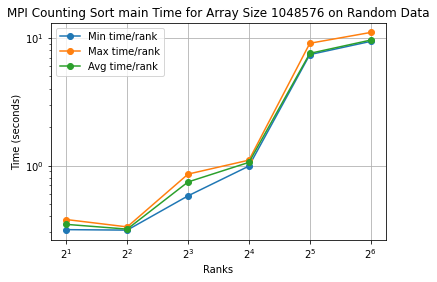

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'MPI Counting Sort main Time for Array Size 1048576 on Random Data'}, xlabel='Ranks', ylabel='Time (seconds)'>)

In [16]:
name = "main"
arraySize = 1048576
plot_mpl(
    df=[ctk.dataframe.loc[name][arraySize]["Min time/rank"],
        ctk.dataframe.loc[name][arraySize]["Max time/rank"],
        ctk.dataframe.loc[name][arraySize]["Avg time/rank"]
        ], 
    title="MPI Counting Sort {} Time for Array Size {} on Random Data".format(name, arraySize),
    xlabel="Ranks",
    ylabel="Time (seconds)",
)